# Logistic regression
用regression處理分類問題

```python
from sklearn.linear_model import LogisticRegression
```
C越小, 允許的誤差越小 
C : float, default: 1.0  
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
%matplotlib inline

from myfun import plot_decision_regions

In [ ]:
data = load_iris()
# we only take the first two features.
X = data.data[:,:2]
y = data.target

In [ ]:
def different_c(drawflag,X,y,C):
    model = LogisticRegression(C=C)
    model.fit(X,y)
    plt.subplot(drawflag)
    plt.tight_layout()
    plot_decision_regions(X,y,model)
    colors='rgb'
    plt.scatter(X[:, 0], X[:, 1], c=[colors[y[i]] for i in range(len(y))], edgecolors='k', cmap=plt.cm.Paired)
    plt.title('C=%d'%C)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
different_c(131,X,y,1)
different_c(132,X,y,10)
different_c(133,X,y,100)
plt.show()


# 'multinomial', 'ovr'


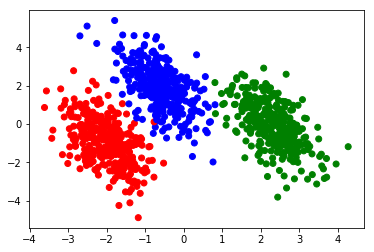

In [22]:
from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

color = "rbg"
color = [color[y[i]] for i in range(len(y))]
plt.scatter(X[:,0],X[:,1],c=color)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


training score : 0.995 (multinomial)


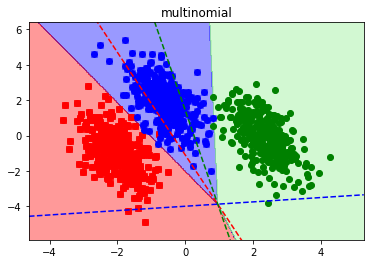

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


training score : 0.976 (ovr)


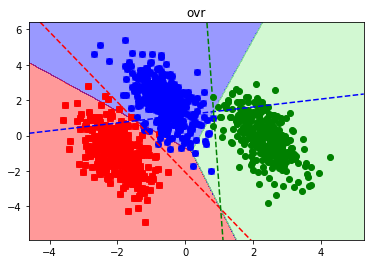

In [38]:
for multi_class_method in ['multinomial', 'ovr']:
    plt.figure()
    model = LogisticRegression(solver='sag',max_iter=100, random_state=42,multi_class=multi_class_method)
    model.fit(X, y)
    print("training score : %.3f (%s)" % (model.score(X, y), multi_class_method))
    plot_decision_regions(X,y,model)
    plt.title(multi_class_method)
    colors = "rbg"
    for i, color in zip(model.classes_, colors):
        #print('i=%d'%i+' c=%s'%color)
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = model.coef_
    intercept = model.intercept_
    #用intercept跟coef畫出hyperplan
    def plot_hyperplane(c, color):
        def line(x0):
            # ay = bx - c, y = (bx -c)/a
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)


    
    plt.show()



In [39]:
model.coef_

array([[-4.41615534, -2.23077034],
       [-0.36796618,  1.64022091],
       [ 4.7027708 ,  0.18133443]])

In [40]:
model.intercept_

array([-4.61020975, -1.91396323, -4.17213317])

# Logistic Regression: Classification of Handwritten Digits
```python
from sklearn.datasets import load_digits
```

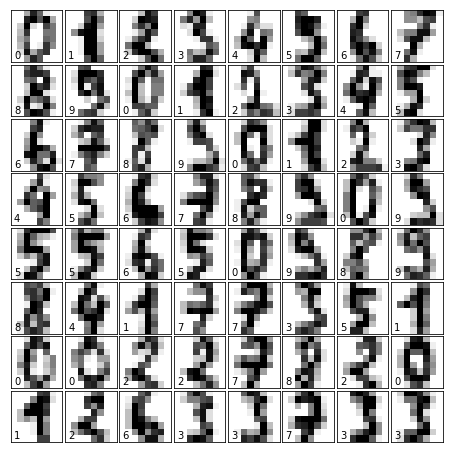

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [83]:
from sklearn.model_selection import train_test_split
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [84]:
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1e-2)
#model = LogisticRegression(solver='sag',max_iter=1000, random_state=42,multi_class='ovr', C=1.0)
#clf = LogisticRegression(C=1e-2,multi_class="ovr",solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

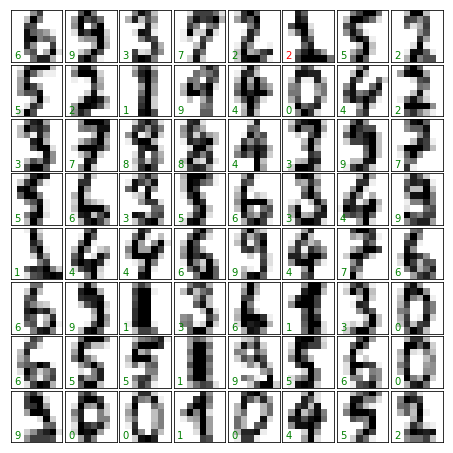

In [85]:
predicted = model.predict(X_test)

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [86]:
#印出accuracy, confusion matrix, f1-score, precision, recall等
#metrics.classification_report可以直接算出precision, recall, f1-score
print(metrics.classification_report(y_true=y_test, y_pred=predicted))

matches = (predicted == y_test)
print('accuracy1:%.3f'%(matches.sum() / float(len(matches))))
print("accuravy2=%f"%metrics.accuracy_score(y_true=y_test, y_pred=predicted))
print('accuracy3:%.2f'%model.score(X_test, y_test))
print("r2=%f"%metrics.r2_score(y_true=y_test, y_pred=predicted))
print("%s"%metrics.confusion_matrix(y_true=y_test, y_pred=predicted))







              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        37
           2       0.95      1.00      0.97        38
           3       1.00      0.93      0.97        46
           4       1.00      0.98      0.99        55
           5       0.93      0.95      0.94        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.90      0.95      0.92        38
           9       0.94      0.94      0.94        48

   micro avg       0.96      0.96      0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450

accuracy1:0.964
accuravy2=0.964444
Accuracy3:0.96
r2=0.948651
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  2  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  2  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0 

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

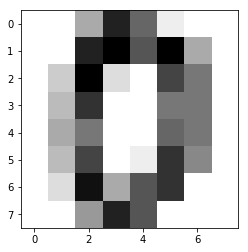

In [73]:
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')
digits.images[0]

# Imbalanced Datasets

In [92]:

# make 3-class dataset for classification
center1 = [[0, 0]]
X1, y1 = make_blobs(n_samples=800, centers=center1, random_state=42)
center2 = [[0, 0],[1, 1]]
X2, y2 = make_blobs(n_samples=200, centers=center2, random_state=42, cluster_std=0.3)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

* 準確率比全猜好人還低

Accuracy:0.88


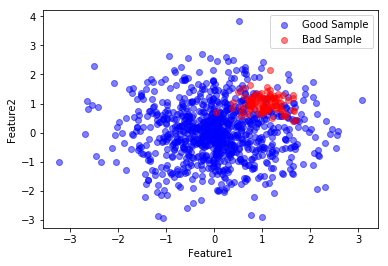

In [96]:
#model = LogisticRegression()
model = LogisticRegression(solver='liblinear',max_iter=1000, random_state=42,multi_class='ovr', C=1)
model.fit(X, y)
prediction = model.predict(X)
print('Accuracy:%.2f'%model.score(X, y))
color = "br"
label = ['Good Sample', 'Bad Sample']
#color = [color[prediction[i]] for i in range(len(y))]
#label = [label[prediction[i]] for i in range(len(y))]
for i in range(2):
    plt.scatter(X[y==i][:,0],X[y==i][:,1],c=color[i],label=label[i],alpha=.5)
plt.legend()    
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

### predict_proba

In [97]:
print(model.predict_proba(X))

[[0.93888571 0.06111429]
 [0.42284021 0.57715979]
 [0.91550431 0.08449569]
 ...
 [0.59365023 0.40634977]
 [0.64880506 0.35119494]
 [0.98317867 0.01682133]]
